# Data Analysis with Spotify Top 50 Tracks

Project focuses on analyzing the Top 50 Spotify Tracks of 2020 dataset using Pandas. The objective is to explore various data processing techniques, including data cleaning, exploratory data analysis (EDA), and feature correlation analysis.
The dataset contains the top 50 Spotify tracks from 2020 and includes various features such as danceability, loudness, acousticness, genre, and popularity.

# Data Analysis with Spotify Top 50 Tracks

## Importing Libraries
Importing the necessary libraries.


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np

## Data Cleaning
In this section, we will handle missing values, remove duplicates, and drop unnecessary columns.
During data cleaning, outliers are not treated because the dataset consists of the top 50 tracks, which are already curated based on popularity. The focus is on analyzing trends and patterns within this specific subset of mainstream music, where extreme values are unlikely to distort the analysis. Instead, attention is given to handling missing values, duplicates, and inconsistent formatting, ensuring the dataset is accurate and ready for analysis.

In [41]:
# Load Data
file_path = 'spotifytoptracks.csv'
df = pd.read_csv(file_path) # Reads the CSV file into a pandas DataFrame 

In [42]:
# Define cleaning function
def clean_data(df):
    if 'Unnamed: 0' in df.columns:
        df.drop(columns=['Unnamed: 0'], inplace=True)
        print("Dropped column: 'Unnamed: 0'.")  # Column didn't provide useful info.

    # Check for missing values and duplicates
    missing_count = df.isnull().sum().sum()  # Total missing values
    duplicate_count = df.duplicated().sum()  # Total duplicate rows
    
    # Report findings
    print(f"Missing values in dataset: {missing_count}")
    print(f"Duplicate rows in dataset: {duplicate_count}")

    return df

# Analyze the data
df = clean_data(df)
df.head()


Dropped column: 'Unnamed: 0'.
Missing values in dataset: 0
Duplicate rows in dataset: 0


,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


## Exploratory Data Analysis (EDA)
Overview of the dataset, analyze artists, albums, genres, and track features.


In [43]:
# Dataset Overview
def dataset_overview(df):
    # Get the number of rows and columns in the DataFrame
    num_rows, num_columns = df.shape
    print(f"Number of observations: {num_rows}")
    print(f"Number of features: {num_columns}")
    print("\nColumn Data Types:\n", df.dtypes)

    
    # Identify categorical features (columns with object data type)
    categorical_features = df.select_dtypes(include=['object']).columns.tolist()
    # Identify numeric features (columns with numeric data type)
    numeric_features = df.select_dtypes(include=['number']).columns.tolist()

    print("\nCategorical Features:", categorical_features)
    print("Numeric Features:", numeric_features)

dataset_overview(df)


Number of observations: 50
Number of features: 16

Column Data Types:
 artist               object
album                object
track_name           object
track_id             object
energy              float64
danceability        float64
key                   int64
loudness            float64
acousticness        float64
speechiness         float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
genre                object
dtype: object

Categorical Features: ['artist', 'album', 'track_name', 'track_id', 'genre']
Numeric Features: ['energy', 'danceability', 'key', 'loudness', 'acousticness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']


### Artist Analysis
This cell analyzes artists with multiple top tracks and identifies the most popular artist based on the highest energy score.


In [44]:
def artist_analysis(df):
    # Count of tracks for each artist
    artist_counts = df['artist'].value_counts()
    # Identify artists with more than one popular track
    multiple_top_tracks = artist_counts[artist_counts > 1]
    
     # Artists with multiple top tracks
    print("\nArtists with multiple top tracks:\n", multiple_top_tracks)
    print(f"\nThere are {len(multiple_top_tracks)} artists that have more than 1 popular track.")

    # Most Popular Artist(s) (with the most tracks)
    max_tracks = artist_counts.max()
    most_tracks_artists = artist_counts[artist_counts == max_tracks].index.tolist()
    print(f"\nMost Popular Artists (Most Tracks): {', '.join(most_tracks_artists)}")

    # Calculate the total number of unique artists in the top 50
    total_artists = df['artist'].nunique()
    print(f"\nTotal number of unique artists in the top 50: {total_artists}")
    top_artists = df['artist'].value_counts().head(10)

artist_analysis(df)



Artists with multiple top tracks:
 artist
Billie Eilish    3
Dua Lipa         3
Travis Scott     3
Justin Bieber    2
Harry Styles     2
Lewis Capaldi    2
Post Malone      2
Name: count, dtype: int64

There are 7 artists that have more than 1 popular track.

Most Popular Artists (Most Tracks): Billie Eilish, Dua Lipa, Travis Scott

Total number of unique artists in the top 50: 40


### Album Analysis
This cell finds albums with multiple top tracks and provides insights about the total number of unique albums in the top 50.



Albums with multiple top tracks:

Album: Future Nostalgia
    Artist: Dua Lipa
    Track: Don't Start Now

    Artist: Dua Lipa
    Track: Break My Heart

    Artist: Dua Lipa
    Track: Physical

Album: Hollywood's Bleeding
    Artist: Post Malone
    Track: Circles

    Artist: Post Malone
    Track: Sunflower - Spider-Man: Into the Spider-Verse

Album: Fine Line
    Artist: Harry Styles
    Track: Watermelon Sugar

    Artist: Harry Styles
    Track: Adore You

Album: Changes
    Artist: Justin Bieber
    Track: Intentions (feat. Quavo)

    Artist: Justin Bieber
    Track: Yummy


Total number of unique albums in the top 50: 45


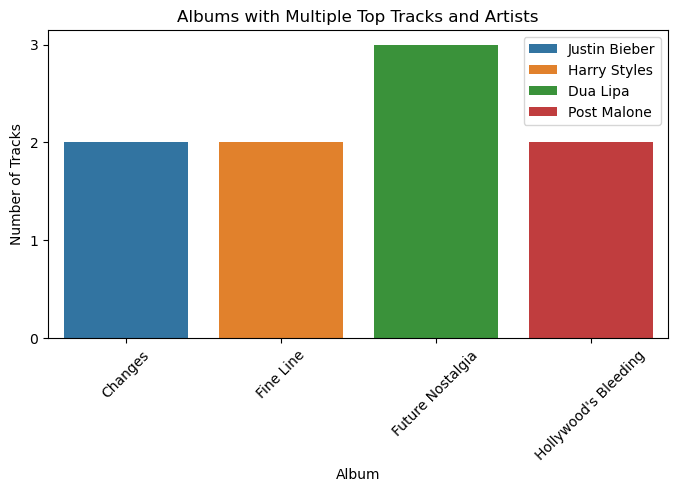

In [45]:
def album_analysis(df):
    # Count the number of tracks for each album in the dataset
    album_counts = df['album'].value_counts()
     # Identify albums with more than one top track
    multiple_top_tracks_albums = album_counts[album_counts > 1]

    print("\nAlbums with multiple top tracks:\n")
    
    # Loop through each album with multiple top tracks and print the related artist and track details
    for album in multiple_top_tracks_albums.index:
        print(f"Album: {album}")
        album_tracks = df[df['album'] == album][['artist', 'track_name']]
        for index, row in album_tracks.iterrows():
            print(f"    Artist: {row['artist']}\n    Track: {row['track_name']}\n")

    # Calculate the total number of unique albums in the top 50
    total_albums = df['album'].nunique()
    print(f"\nTotal number of unique albums in the top 50: {total_albums}")
    
    # Prepare data for visualization by counting the number of tracks per album and artist
    album_artist_counts = df[df['album'].isin(multiple_top_tracks_albums.index)][['album', 'artist']]
    album_artist_counts = album_artist_counts.groupby(['album', 'artist']).size().reset_index(name='track_count')

    # Visualization - create a bar plot showing albums with multiple top tracks and their associated artists
    plt.figure(figsize=(8, 4))
    ax = sns.barplot(x='album', y='track_count', hue='artist', data=album_artist_counts)
    plt.title('Albums with Multiple Top Tracks and Artists')
    plt.xlabel('Album')
    plt.ylabel('Number of Tracks')
    plt.xticks(rotation=45)
    plt.legend(loc='upper right')

    # Ensure y-axis displays whole numbers only
    ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Call the function
album_analysis(df)



### Genre Analysis
This cell identifies the most popular genre and the total number of genres represented in the top 50 tracks.


In [46]:
def genre_analysis(df):
    # Count the number of occurrences for each genre in the dataset
    genre_counts = df['genre'].value_counts()

    # Print the most popular genre (the genre with the highest count)
    print("\nMost Popular Genre:", genre_counts.idxmax())

    # Print the genres that have exactly one song in the dataset
    print("\nGenres with just one song:", genre_counts[genre_counts == 1].index.tolist())

    # Print the total number of unique genres represented in the dataset
    print("\nTotal Genres Represented:", len(genre_counts))

genre_analysis(df)



Most Popular Genre: Pop

Genres with just one song: ['Nu-disco', 'R&B/Hip-Hop alternative', 'Pop/Soft Rock', 'Pop rap', 'Hip-Hop/Trap', 'Dance-pop/Disco', 'Disco-pop', 'Dreampop/Hip-Hop/R&B', 'Alternative/reggaeton/experimental', 'Chamber pop']

Total Genres Represented: 16


### Track Analysis
This cell provides insights about tracks based on danceability, loudness, and length.


Longest and Shortest Tracks

In [47]:
def track_analysis(df):


    # Finding longest and shortest tracks
    longest_track = df.loc[df['duration_ms'].idxmax(), ['track_name', 'artist', 'duration_ms']]
    shortest_track = df.loc[df['duration_ms'].idxmin(), ['track_name', 'artist', 'duration_ms']]

    # Convert duration from milliseconds to minutes and seconds
    def convert_ms_to_min_sec(ms):
        minutes = ms // 60000
        seconds = (ms % 60000) // 1000
        return f"{minutes} min {seconds} sec"

    # Print longest track
    longest_duration = longest_track['duration_ms']
    print("Longest Track:\nTrack Name: {}, Artist: {}, Duration: {}".format(
        longest_track['track_name'], longest_track['artist'], convert_ms_to_min_sec(longest_duration)))

    # Print shortest track
    shortest_duration = shortest_track['duration_ms']
    print("Shortest Track:\nTrack Name: {}, Artist: {}, Duration: {}".format(
        shortest_track['track_name'], shortest_track['artist'], convert_ms_to_min_sec(shortest_duration)))


track_analysis(df)

Longest Track:
Track Name: SICKO MODE, Artist: Travis Scott, Duration: 5 min 12 sec
Shortest Track:
Track Name: Mood (feat. iann dior), Artist: 24kGoldn, Duration: 2 min 20 sec


High and Low Danceability


Tracks with Danceability > 0.7:
                                   track_name          artist  danceability
                                 Dance Monkey     Tones And I         0.825
                                      The Box     Roddy Ricch         0.896
                        Roses - Imanbek Remix       SAINt JHN         0.785
                              Don't Start Now        Dua Lipa         0.793
                 ROCKSTAR (feat. Roddy Ricch)          DaBaby         0.746
             death bed (coffee for your head)           Powfu         0.726
                                      Falling   Trevor Daniel         0.784
                                         Tusa         KAROL G         0.803
                              Blueberry Faygo       Lil Mosey         0.774
                     Intentions (feat. Quavo)   Justin Bieber         0.806
                                 Toosie Slide           Drake         0.830
                                       Say So        Do

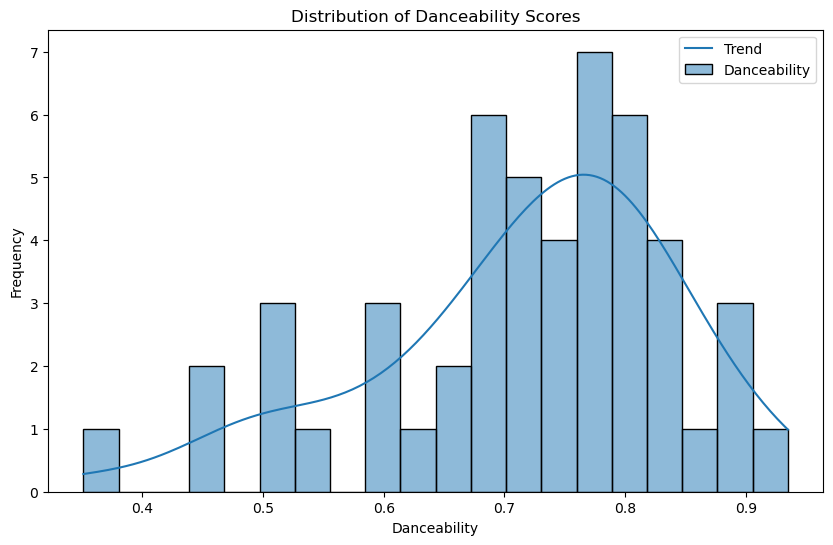

In [48]:
def track_analysis(df):
    # High Danceability Tracks: Filter tracks with danceability greater than 0.7
    high_danceability = df[df['danceability'] > 0.7][['track_name', 'artist', 'danceability']]
    print("\nTracks with Danceability > 0.7:")
    print(high_danceability.to_string(index=False))

        # Low Danceability Tracks: Filter tracks with danceability less than 0.4
    low_danceability = df[df['danceability'] < 0.4][['track_name', 'artist', 'danceability']]
    print("\nTracks with Danceability < 0.4:")
    print(low_danceability.to_string(index=False))

# Visualization for danceability scores
    plt.figure(figsize=(10, 6))
    sns.histplot(df['danceability'], kde=True, bins=20)
    plt.legend(["Trend", "Danceability"])
    plt.title('Distribution of Danceability Scores')
    plt.xlabel('Danceability')
    plt.ylabel('Frequency')
    plt.show()

track_analysis(df)


__Danceability Insides__

Tracks with danceability above 0.7 are frequent in pop, hip-hop, and electronic music, featuring strong rhythmic elements and steady beats that make them ideal for dancing. In contrast, tracks with danceability below 0.4, like lovely (with Khalid), are rare and tend to be slow, atmospheric, or emotionally driven, with less emphasis on a dance-friendly groove.

High Loudness and Low Loudness


Tracks with Loudness > -5 dB:
                                   track_name        artist  loudness
                              Don't Start Now      Dua Lipa    -4.521
                             Watermelon Sugar  Harry Styles    -4.209
                                         Tusa       KAROL G    -3.280
                                      Circles   Post Malone    -3.497
                                Before You Go Lewis Capaldi    -4.858
                                       Say So      Doja Cat    -4.577
                                    Adore You  Harry Styles    -3.675
                       Mood (feat. iann dior)      24kGoldn    -3.558
                               Break My Heart      Dua Lipa    -3.434
                                     Dynamite           BTS    -4.410
             Supalonely (feat. Gus Dapperton)         BENEE    -4.746
              Rain On Me (with Ariana Grande)     Lady Gaga    -3.764
Sunflower - Spider-Man: Into the Spider-Verse   Post Malone

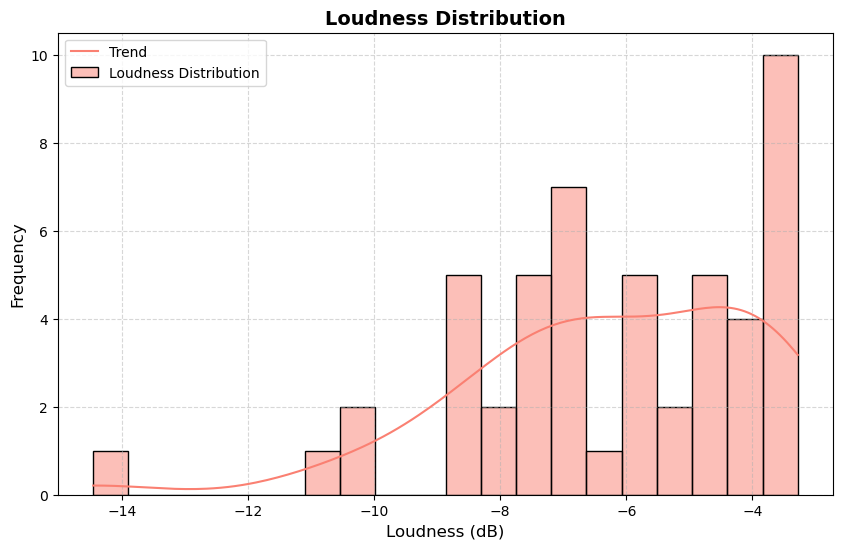

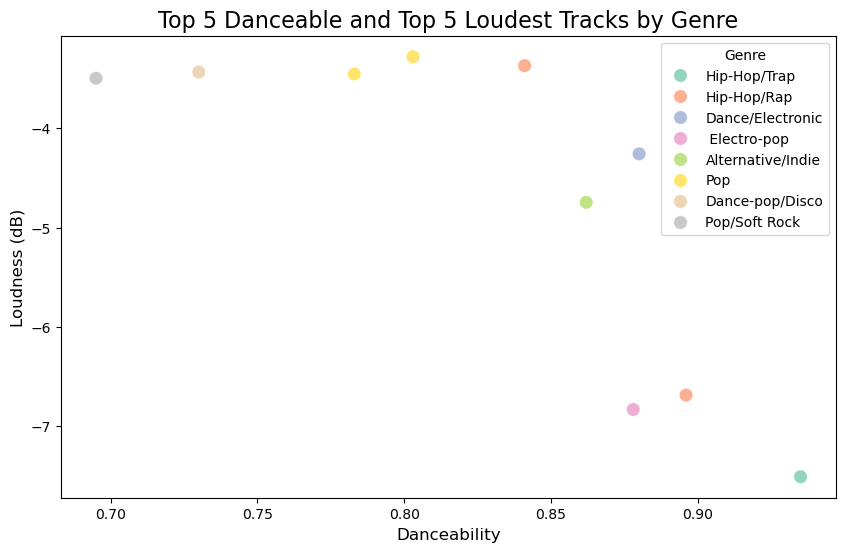

In [49]:
def track_analysis(df):
# High Loudness Tracks: Filter tracks with loudness greater than -5 dB
    high_loudness = df[df['loudness'] > -5][['track_name', 'artist', 'loudness']]
    print("\nTracks with Loudness > -5 dB:")
    print(high_loudness.to_string(index=False))

    # Low Loudness Tracks: Filter tracks with loudness less than -8 dB
    low_loudness = df[df['loudness'] < -8][['track_name', 'artist', 'loudness']]
    print("\nTracks with Loudness < -8 dB:")
    print(low_loudness.to_string(index=False))

# Visualization: Loudness Distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(df['loudness'], kde=True, bins=20, color="salmon")
    plt.legend(["Trend", "Loudness Distribution"])
    plt.title('Loudness Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('Loudness (dB)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()

        # Get the top 5 most danceable tracks
    top_danceable = df.nlargest(5, 'danceability')

    # Get the top 5 loudest tracks
    top_loudest = df.nlargest(5, 'loudness')

    # Combine both datasets
    top_tracks = pd.concat([top_danceable, top_loudest])

    # Create a scatter plot with a diverse color palette
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='danceability', y='loudness', hue='genre', data=top_tracks, palette='Set2', s=100, alpha=0.7)

    # Add labels and title
    plt.title('Top 5 Danceable and Top 5 Loudest Tracks by Genre', fontsize=16)
    plt.xlabel('Danceability', fontsize=12)
    plt.ylabel('Loudness (dB)', fontsize=12)

    # Show the plot
    plt.legend(title='Genre')
    plt.show()


track_analysis(df)  

__Loudness Insides__

Tracks with loudness greater than -5 dB are more frequent in mainstream pop, dance, and hip-hop, reflecting their compressed, high-energy production optimized for loud playback. In contrast, tracks below -8 dB are less frequent and often belong to genres like indie, R&B, or acoustic ballads, where dynamic range is preserved for a more intimate listening experience.

__Track Analyses Insides__

Dataset reflects trending music styles, where loud, and danceable songs dominate.

Hip-hop and pop dominate the danceable & loud categories, reinforcing their popularity in mainstream charts.

### Correlation Analysis
This cell identifies strong positive and negative correlations between numeric features.



Strongly Positively Correlated Features:
   Feature_1 Feature_2  Correlation
1    energy  loudness      0.79164

Strongly Negatively Correlated Features:
           Feature_1 Feature_2  Correlation
2      acousticness    energy    -0.682479
3  instrumentalness  loudness    -0.553735

Features with No Strong Correlation:
       Feature_1         Feature_2  Correlation
0        energy       speechiness     0.074267
1        energy          liveness     0.069487
2        energy             tempo     0.075191
4  danceability  instrumentalness    -0.017706
5  danceability          liveness    -0.006648


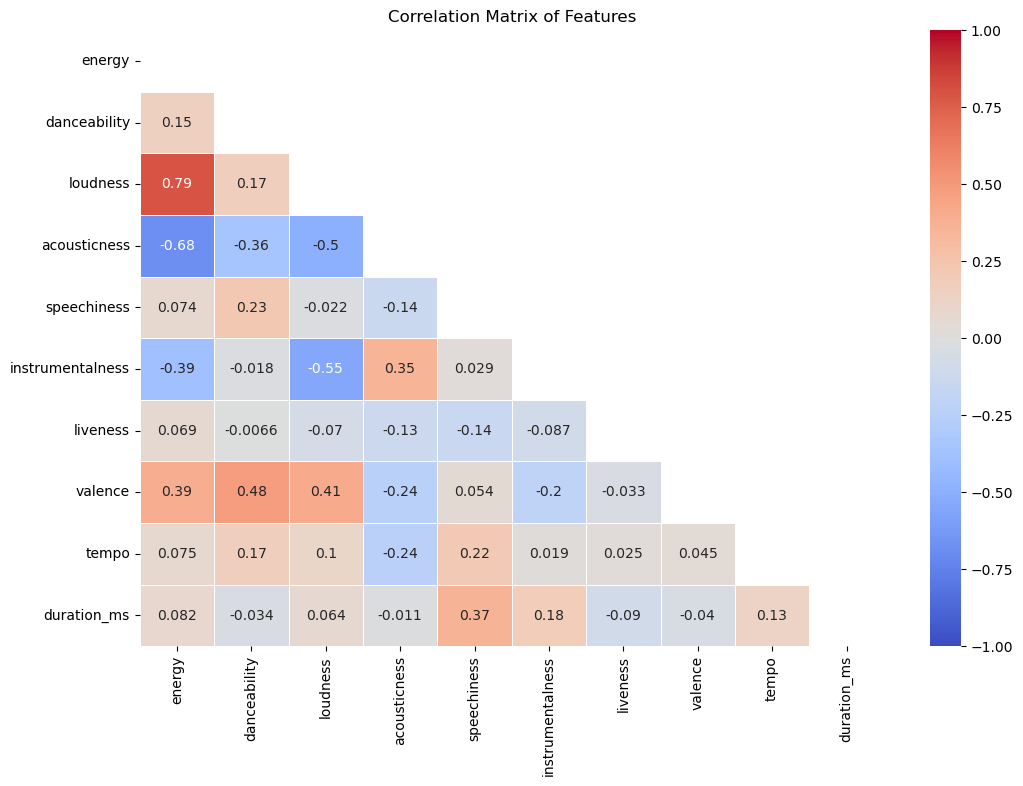

In [50]:


def correlation_analysis(df):
    # Drop 'key' column if it exists
    if 'key' in df.columns:
        df = df.drop(columns=['key'])

    # Calculate the correlation matrix for numeric features
    correlation_matrix = df.corr(numeric_only=True)

    def extract_unique_correlations(corr_matrix, condition):
        """Extract unique correlation pairs based on a condition."""
        correlations = corr_matrix[condition].stack().reset_index()
        correlations.columns = ['Feature_1', 'Feature_2', 'Correlation']
        correlations = correlations[correlations['Feature_1'] != correlations['Feature_2']]
        correlations = correlations[correlations['Feature_1'] < correlations['Feature_2']]
        return correlations

    # Extract features with a strong positive correlation (> 0.5)
    strong_positive = extract_unique_correlations(correlation_matrix, correlation_matrix > 0.5)
    print("\nStrongly Positively Correlated Features:\n", strong_positive)

    # Extract features with a strong negative correlation (< -0.5)
    strong_negative = extract_unique_correlations(correlation_matrix, correlation_matrix < -0.5)
    print("\nStrongly Negatively Correlated Features:\n", strong_negative)

    # Extract features with weak correlations (-0.1 to 0.1)
    weak_correlations = extract_unique_correlations(correlation_matrix, (correlation_matrix > -0.1) & (correlation_matrix < 0.1))
    print("\nFeatures with No Strong Correlation:\n", weak_correlations.head())

    # Heatmap for correlation matrix
    plt.figure(figsize=(12, 8))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, mask=mask, vmin=-1, vmax=1) 
    plt.title('Correlation Matrix of Features')
    plt.show()

correlation_analysis(df)


__Correlation Insights__

Strong Positive Correlation:
Energy - Loudness (0.79): Louder songs tend to have higher energy.

Strong Negative Correlation:
Energy - Acousticness (-0.68): High-energy tracks are usually less acoustic.
Loudness - Instrumentalness (-0.55): Louder tracks tend to have fewer instrumentals.

Tempo, key, and speechiness have no significant impact on energy, danceability, or loudness.
Takeaway: Loud, energetic songs are less acoustic and less instrumental, reinforcing their electronic or heavily produced nature.

### Genre-based Comparisons
This cell compares danceability, loudness, and acousticness across major genres.



Danceability comparison by genre:
 genre
Hip-Hop/Rap          0.765538
Dance/Electronic     0.755000
Pop                  0.677571
Alternative/Indie    0.661750
Name: danceability, dtype: float64

Loudness comparison by genre:
 genre
Dance/Electronic    -5.338000
Alternative/Indie   -5.421000
Pop                 -6.460357
Hip-Hop/Rap         -6.917846
Name: loudness, dtype: float64

Acousticness comparison by genre:
 genre
Alternative/Indie    0.583500
Pop                  0.323843
Hip-Hop/Rap          0.188741
Dance/Electronic     0.099440
Name: acousticness, dtype: float64


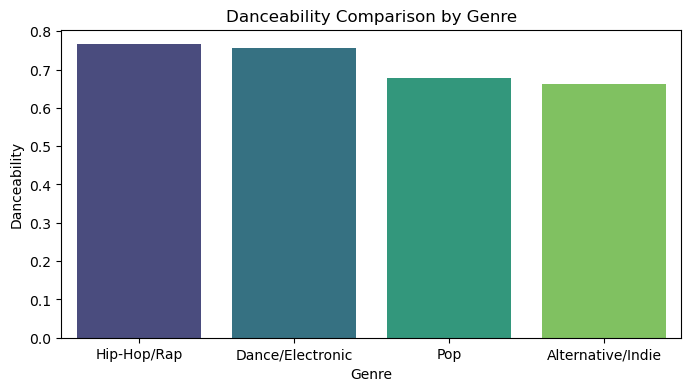

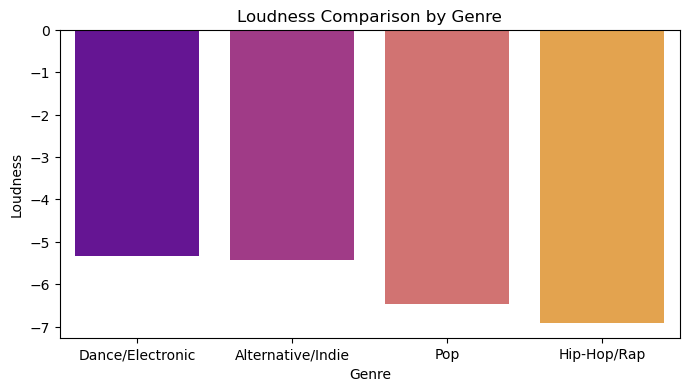

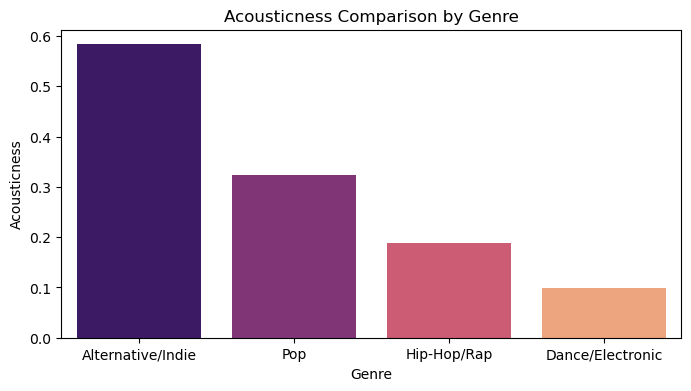

In [51]:
# Function to compare feature values across selected genres
def genre_comparison(df, feature):
    # List of major genres to focus on for comparison
    major_genres = ['Pop', 'Hip-Hop/Rap', 'Dance/Electronic', 'Alternative/Indie']
    # Filter the dataframe for the major genres
    df_filtered = df[df['genre'].isin(major_genres)]
    # Group by genre and calculate the mean of the specified feature, then sort values in descending order
    return df_filtered.groupby('genre')[feature].mean().sort_values(ascending=False)


print("\nDanceability comparison by genre:\n", genre_comparison(df, 'danceability'))
print("\nLoudness comparison by genre:\n", genre_comparison(df, 'loudness'))
print("\nAcousticness comparison by genre:\n", genre_comparison(df, 'acousticness'))

# Generate comparison data for danceability, loudness, and acousticness
danceability_comparison = genre_comparison(df, 'danceability')
loudness_comparison = genre_comparison(df, 'loudness')
acousticness_comparison = genre_comparison(df, 'acousticness')

# Visualization for Danceability by Genre
plt.figure(figsize=(8, 4))
# Create a bar plot for danceability comparison across genres
sns.barplot(x=danceability_comparison.index, y=danceability_comparison.values, hue=danceability_comparison.index, palette='viridis', dodge=False)
plt.title('Danceability Comparison by Genre')
plt.xlabel('Genre')
plt.ylabel('Danceability')
plt.show()

# Visualization for Loudness by Genre
plt.figure(figsize=(8, 4))
# Create a bar plot for loudness comparison across genres
sns.barplot(x=loudness_comparison.index, y=loudness_comparison.values, hue=loudness_comparison.index, palette='plasma', dodge=False)
plt.title('Loudness Comparison by Genre')
plt.xlabel('Genre')
plt.ylabel('Loudness')
plt.show()

# Visualization for Acousticness by Genre
plt.figure(figsize=(8, 4))
# Create a bar plot for Acousticness comparison across genres
sns.barplot(x=acousticness_comparison.index, y=acousticness_comparison.values, hue=acousticness_comparison.index, palette='magma', dodge=False)
plt.title('Acousticness Comparison by Genre')
plt.xlabel('Genre')
plt.ylabel('Acousticness')
plt.show()


__Key Genre Insights__

Danceability
Hip-Hop (0.77) and Dance/Electronic (0.76) are the most danceable, built for clubs and parties. Pop and Alternative/Indie are lower, often favoring emotional or experimental styles.

Loudness
Dance/Electronic (-5.34 dB) and Alternative/Indie (-5.42 dB) are the loudest. Hip-Hop (-6.92 dB) is the quietest, likely due to its dynamic shifts between soft verses and loud choruses.

Acousticness
Alternative/Indie (0.58) is the most acoustic, featuring more live instruments. Pop (0.32) blends acoustic and electronic sounds, while Hip-Hop (0.19) and Dance/Electronic (0.10) rely on digital production.

__Takeaway for the Music Industry__

- The popularity of loud, energetic, and danceable tracks suggests a growing preference for high-energy music in mainstream charts.

- Pop and hip-hop are likely to continue leading the charts, with their strong presence in danceability and loudness.

- For genres like Alternative/Indie, the focus on acoustic and less electronic production may appeal to a niche audience, which could drive their future growth, especially in live performances or specialized media.

- The dominance of certain albums (e.g., Dua Lipa's "Future Nostalgia") and artists indicates that trends are often shaped by the output of a few key influencers in the industry.

__Suggestions__

Suggestions for improving analysis from here on for business purpouses.

- Track Duration & Consumer Behavior: Investigate how track length affects streaming patterns and user engagement, such as completion rates.
- Market Segment Analysis: Segment by demographics (age, location) to understand how different groups engage with genres.
- Correlation with Sales/Streaming: Link track features with actual sales or streaming data to understand commercial success drivers.